### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.random.set_seed(42)

In [6]:
tf.__version__

'2.0.0'

### Collect Data

In [4]:
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [9]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
First 5 examples now are:  [9 0 0 3 0]


In [11]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000,)
First 5 examples now are:  [9 2 1 1 6]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [13]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


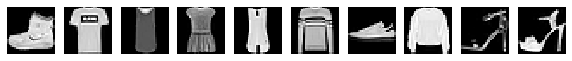

In [17]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

# Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])


### Execute the model using model.fit()

In [19]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)          

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/sample - loss: 2000.8765 - accuracy: 0.7389 - val_loss: 1218.6149 - val_accuracy: 0.8097
Epoch 2/50
60000/60000 [==============================] - 4s 66us/sample - loss: 1620.7538 - accuracy: 0.7789 - val_loss: 1943.1677 - val_accuracy: 0.7038
Epoch 3/50
60000/60000 [==============================] - 4s 68us/sample - loss: 1547.9714 - accuracy: 0.7868 - val_loss: 1591.0958 - val_accuracy: 0.8006
Epoch 4/50
60000/60000 [==============================] - 4s 67us/sample - loss: 1527.5683 - accuracy: 0.7880 - val_loss: 1032.1688 - val_accuracy: 0.8270
Epoch 5/50
60000/60000 [==============================] - 4s 63us/sample - loss: 1499.5873 - accuracy: 0.7943 - val_loss: 1616.0800 - val_accuracy: 0.7668
Epoch 6/50
60000/60000 [==============================] - 4s 62us/sample - loss: 1488.0137 - accuracy: 0.7932 - val_loss: 1338.2336 - val_accuracy: 0.7664
Epoch 7/50
60000/600

In [20]:
model.predict(testX)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
  score = model.evaluate( testX,testY)
  score

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1163.8224282226563, 0.8069]

In [22]:
model.metrics_names

['loss', 'accuracy']

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, input_shape=(784,), activation = 'softmax'))

# Comile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])



### Execute the model

In [24]:
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5955 - accuracy: 0.7956 - val_loss: 0.5088 - val_accuracy: 0.8241
Epoch 2/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4907 - accuracy: 0.8306 - val_loss: 0.4866 - val_accuracy: 0.8305
Epoch 3/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4679 - accuracy: 0.8390 - val_loss: 0.4876 - val_accuracy: 0.8356
Epoch 4/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4555 - accuracy: 0.8420 - val_loss: 0.4724 - val_accuracy: 0.8368
Epoch 5/50
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4502 - accuracy: 0.8454 - val_loss: 0.4656 - val_accuracy: 0.8405
Epoch 6/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4445 - accuracy: 0.8462 - val_loss: 0.4564 - val_accuracy: 0.8415
Epoch 7/50
60000/60000 [==============================] 

In [25]:
score = model2.evaluate( testX,testY)
score

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4725076551914215, 0.8412]

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize Sequential model
model3= tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model3.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation = 'softmax'))

sgd = tf.keras.optimizers.SGD(lr=.001, decay=1e-6, momentum=0.9)

# Comile the model
model3.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])


In [27]:
model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.6038 - accuracy: 0.7932 - val_loss: 0.5110 - val_accuracy: 0.8247
Epoch 2/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4903 - accuracy: 0.8311 - val_loss: 0.4917 - val_accuracy: 0.8329
Epoch 3/50
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4681 - accuracy: 0.8382 - val_loss: 0.4952 - val_accuracy: 0.8359
Epoch 4/50
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4559 - accuracy: 0.8426 - val_loss: 0.4784 - val_accuracy: 0.8380
Epoch 5/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4502 - accuracy: 0.8441 - val_loss: 0.4750 - val_accuracy: 0.8382
Epoch 6/50
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4442 - accuracy: 0.8461 - val_loss: 0.4623 - val_accuracy: 0.8398
Epoch 7/50
60000/60000 [==============================] 

In [28]:
score = model3.evaluate( testX,testY)
score

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.46941008915901183, 0.8412]

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
learning_rate = 0.03
hidden_nodes = 100
output_nodes = 10

# Initialize Sequential model
model4= tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 28x28 to 784
model4.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Normalize the data
model4.add(tf.keras.layers.BatchNormalization())

#1st Dense Layer with hidden nodes
model4.add(tf.keras.layers.Dense(hidden_nodes, activation='sigmoid'))

#2nd Dense Layer with hidden nodes
model4.add(tf.keras.layers.Dense(hidden_nodes, activation='sigmoid'))

# Add Dense Layer which provides 10 Outputs after applying softmax
model4.add(tf.keras.layers.Dense(output_nodes, activation = 'softmax'))

sgd = tf.keras.optimizers.SGD(lr=.03, decay=1e-6, momentum=0.9)

# Comile the model
model4.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [10]:
model4.fit(trainX, trainY, validation_data=(testX, testY), epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5622 - accuracy: 0.7979 - val_loss: 0.4123 - val_accuracy: 0.8489
Epoch 2/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4029 - accuracy: 0.8537 - val_loss: 0.4144 - val_accuracy: 0.8510
Epoch 3/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3647 - accuracy: 0.8674 - val_loss: 0.3717 - val_accuracy: 0.8610
Epoch 4/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3384 - accuracy: 0.8747 - val_loss: 0.3488 - val_accuracy: 0.8706
Epoch 5/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3194 - accuracy: 0.8822 - val_loss: 0.3476 - val_accuracy: 0.8740
Epoch 6/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3053 - accuracy: 0.8863 - val_loss: 0.3393 - val_accuracy: 0.8764
Epoch 7/50
60000/60000 [==============================]

In [11]:
score = model4.evaluate(testX,testY)
score

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.38747943090200426, 0.8852]

## Review model

If we see the test score of all these 4 models, we see the accuracy gradually increased in each model. First model where we did not normalize, it was showing 80% accuracy. When we normalized and used default parameters, it improved the performamce and scored 84% accuracy. After tweaking the learning rate a bit, it remained almost same around 84%. And when we added hidden layers with 100 neurons each, it improved the performance and scored 88 % accuracy on learning rate 0.03

### Run the model

Since Model4 is giving highest accuracy, we will run this model to predict the class.

In [20]:
model4.predict(testX.astype('float32'))

array([[1.47204393e-09, 5.87226379e-10, 1.29603821e-08, ...,
        1.55977125e-03, 1.61046483e-08, 9.98411179e-01],
       [1.63460700e-05, 1.23138744e-08, 9.95763659e-01, ...,
        1.47642805e-08, 1.94094563e-09, 1.06286902e-09],
       [9.94713645e-08, 9.99999881e-01, 1.10516407e-09, ...,
        2.94204071e-11, 1.45151413e-09, 6.32029975e-12],
       ...,
       [6.42142186e-05, 7.93716148e-10, 2.77078448e-06, ...,
        7.24154631e-07, 9.99894142e-01, 1.07749107e-08],
       [4.04382389e-10, 1.00000000e+00, 4.38370130e-12, ...,
        6.25163387e-13, 8.24693341e-13, 2.65713198e-11],
       [2.64176320e-10, 1.42976708e-09, 2.94141557e-07, ...,
        1.14278839e-04, 6.26898145e-06, 2.61480579e-08]], dtype=float32)

In [0]:
predicted = model4.predict_classes(testX.astype('float32'))

In [25]:
predicted

array([9, 2, 1, ..., 8, 1, 5])